In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-products/top_products.csv
/kaggle/input/sample-superstore/Sample - Superstore.xls
/kaggle/input/monthly-sales/monthly_sales.csv
/kaggle/input/sales-by-region/sales_by_region.csv
/kaggle/input/cleaned-superstore/cleaned_superstore.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import os
print(os.getcwd())
# Expected output: /kaggle/working

/kaggle/working


In [4]:
df = pd.read_csv("/kaggle/input/cleaned-superstore/cleaned_superstore.csv")
monthly_sales = pd.read_csv("/kaggle/input/monthly-sales/monthly_sales.csv")
sales_by_region = pd.read_csv("/kaggle/input/sales-by-region/sales_by_region.csv")

In [5]:
monthly_sales.head()
#df.groupby(order_date)

,order_year,order_month,total_sales
0,2011,1,5147.489
1,2011,2,3554.338
2,2011,3,12452.536
3,2011,4,11421.191
4,2011,5,10456.715


In [6]:
#df["sum_sales_by_date"]=df.groupby(df["order_date"]).transform("sum")
df["sum_sales_by_date"] = (
    df.groupby("order_date")["sales"].transform("sum")
)
#df.drop("sum_sales_by_date")

In [7]:
df.head()
#monthly_sales["order_month"].dtype
df.dtypes

row_id                 int64
order_id              object
order_date            object
ship_date             object
ship_mode             object
customer_id           object
customer_name         object
segment               object
country               object
city                  object
state                 object
postal_code            int64
region                object
product_id            object
category              object
sub-category          object
product_name          object
sales                float64
quantity               int64
discount             float64
profit               float64
sum_sales_by_date    float64
dtype: object

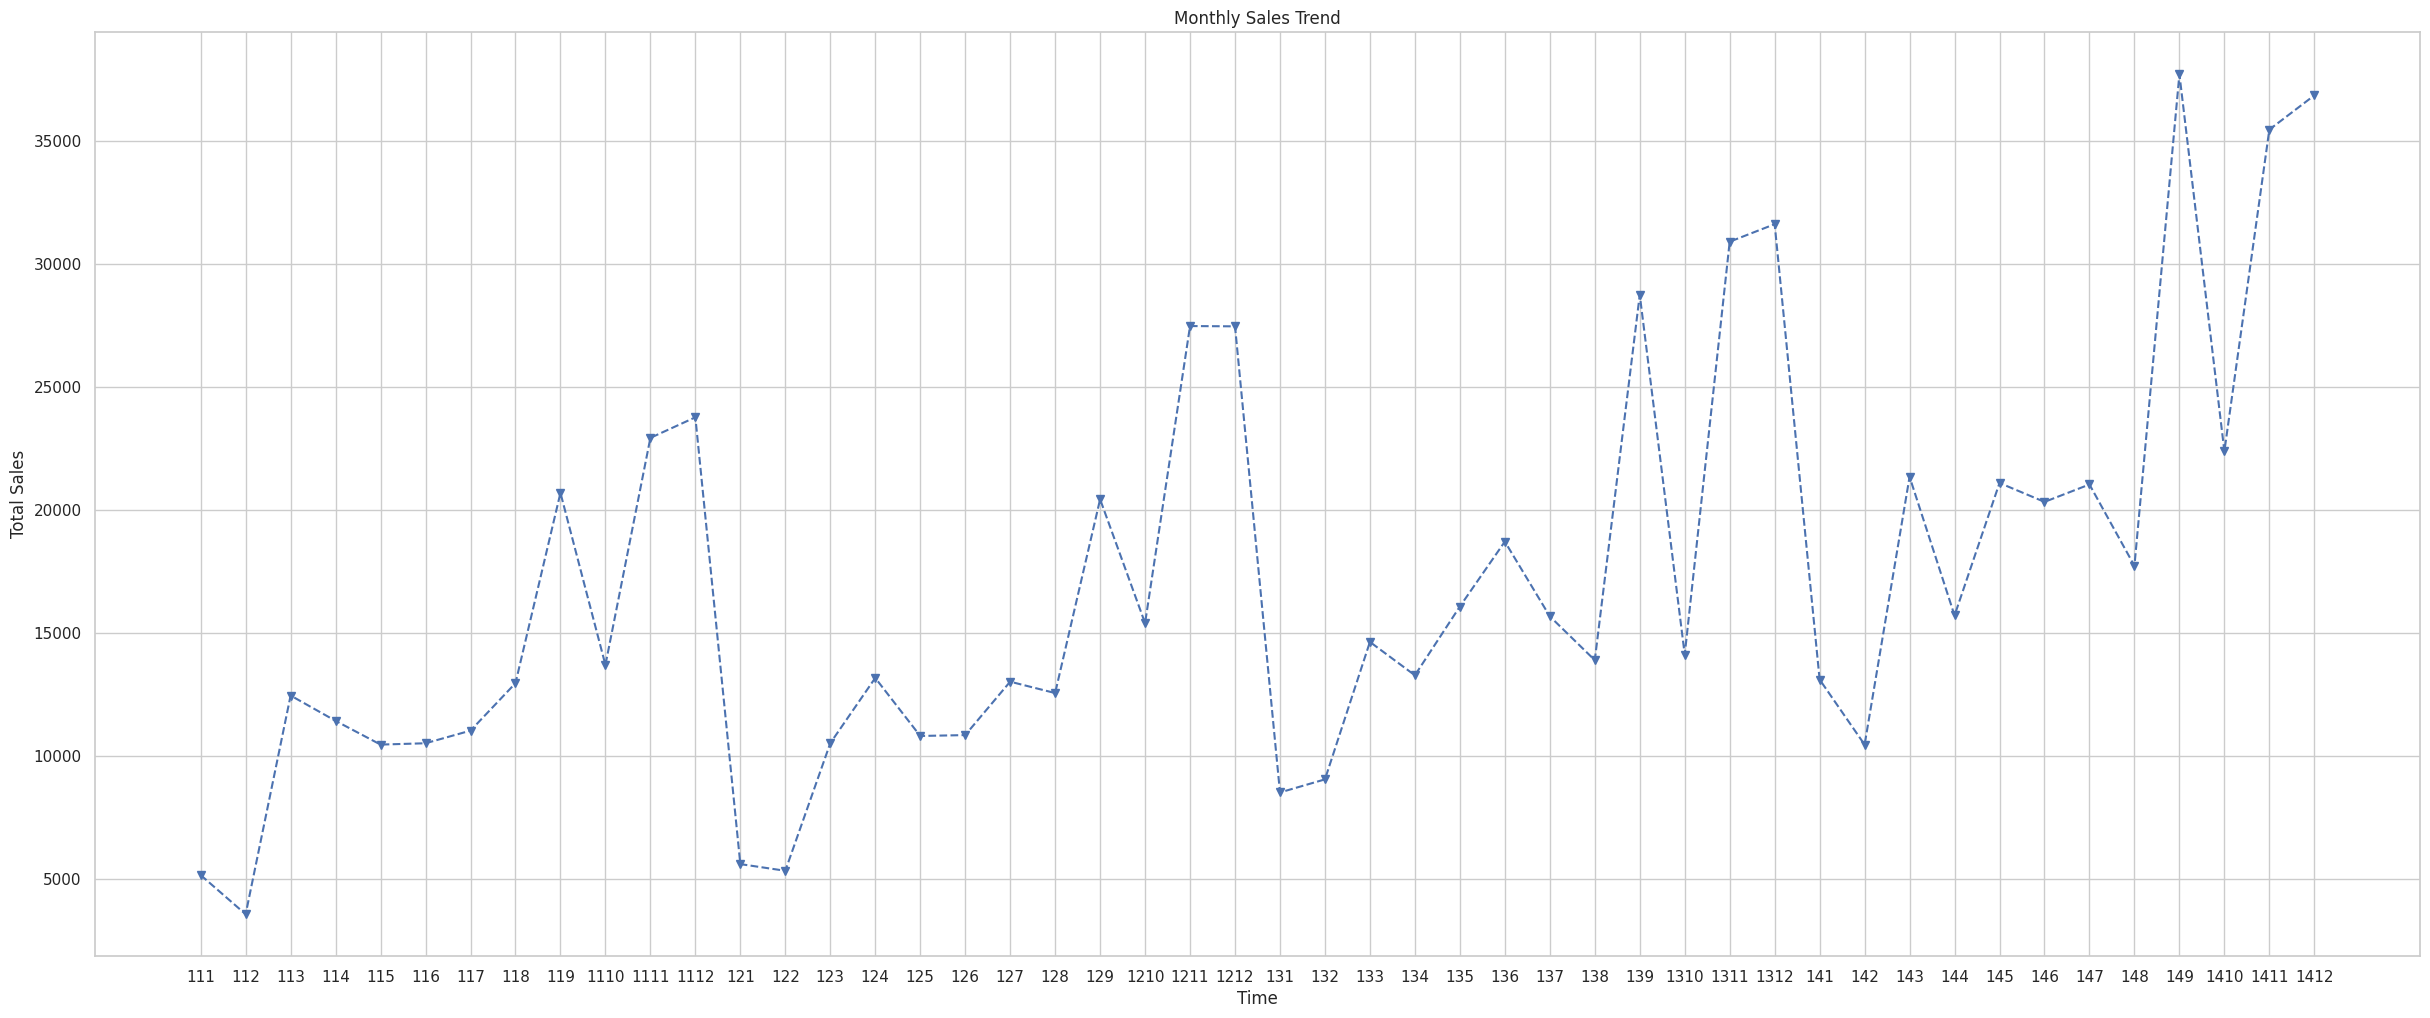

In [8]:
plt.figure(figsize=(30,12))
plt.plot(
    monthly_sales["order_year"].astype(str).str[-2:] + monthly_sales["order_month"].astype(str),
    monthly_sales["total_sales"],
    linestyle="--",
    marker="v"
)
plt.title("Monthly Sales Trend")
plt.xlabel("Time")
plt.ylabel("Total Sales")
plt.show()

## Key Insights

1. Sales show strong seasonality with peaks in Q4.

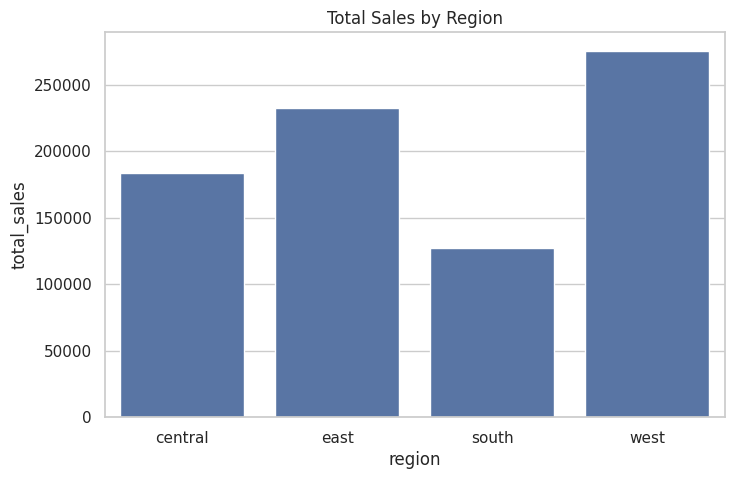

In [9]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=sales_by_region,
    x="region",
    y="total_sales"
)
plt.title("Total Sales by Region")

plt.show()

## Key Insights
2. West region outperforms others consistently.
## Business Recommendations
- Optimize discount strategy by region.

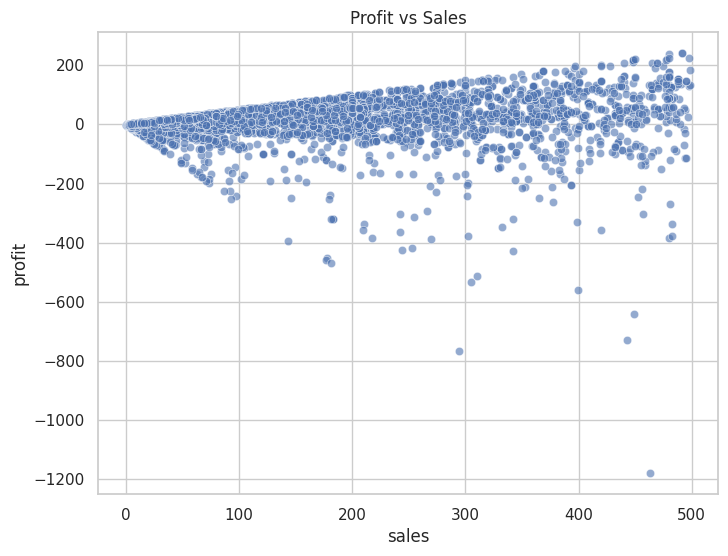

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="sales",
    y="profit",
    alpha=0.6
)
plt.title("Profit vs Sales")
plt.show()

In [11]:
df[["sales", "profit", "discount"]].corr()

,sales,profit,discount
sales,1.000000,0.196448,-0.075480
profit,0.196448,1.000000,-0.457813
discount,-0.075480,-0.457813,1.000000


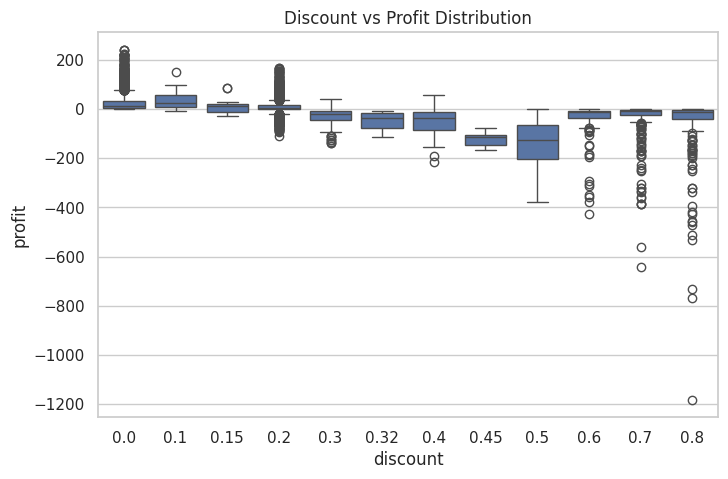

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="discount",
    y="profit"
)
plt.title("Discount vs Profit Distribution")
plt.show()

## Key Insights
3. High discounts (>30%) often lead to negative profit.

## Business Recommendations
- Optimize discount strategy by region.


In [13]:
df["ship_delay_days"] = (pd.to_datetime(df["ship_date"]) - pd.to_datetime(df["order_date"])).dt.days
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,sum_sales_by_date,ship_delay_days
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,261.960,3
1,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,1954.584,4
2,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,54.318,7
3,6,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,496.948,5
4,7,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,496.948,5


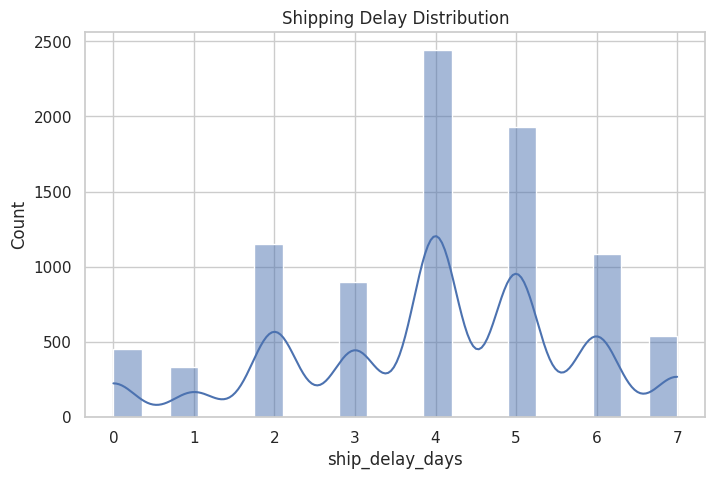

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(
    df["ship_delay_days"],
    bins=20,
    kde=True
)
plt.title("Shipping Delay Distribution")
plt.show()


## Key Insights
4. Shipping delays beyond 5 days show diminishing profit returns.
## Business Recommendations
- Improve logistics to reduce shipping delays.

In [15]:
df[df["ship_delay_days"] > 6]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,sum_sales_by_date,ship_delay_days
2,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,54.318,7
73,87,CA-2014-155558,2014-10-27,2014-11-03,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,Rochester,...,TEC-AC-10001998,Technology,Accessories,Logitech LS21 Speaker System - PC Multimedia -...,19.990,1,0.0,6.7966,999.868,7
74,88,CA-2014-155558,2014-10-27,2014-11-03,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,Rochester,...,OFF-LA-10000134,Office Supplies,Labels,Avery 511,6.160,2,0.0,2.9568,999.868,7
98,112,CA-2013-128867,2013-11-04,2013-11-11,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Urbandale,...,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",75.960,2,0.0,22.7880,1858.376,7
99,113,CA-2013-128867,2013-11-04,2013-11-11,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Urbandale,...,OFF-BI-10003981,Office Supplies,Binders,"Avery Durable Plastic 1"" Binders",27.240,6,0.0,13.3476,1858.376,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,9802,CA-2014-137918,2014-09-30,2014-10-07,Standard Class,JK-15730,Joe Kamberova,Consumer,United States,Lodi,...,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,97.300,7,0.0,28.2170,1944.080,7
8675,9828,CA-2014-169999,2014-06-20,2014-06-27,Standard Class,JS-15685,Jim Sink,Corporate,United States,New York City,...,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,129.300,2,0.0,6.4650,1355.825,7
8676,9829,CA-2014-169999,2014-06-20,2014-06-27,Standard Class,JS-15685,Jim Sink,Corporate,United States,New York City,...,OFF-BI-10004728,Office Supplies,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,11.568,3,0.2,3.7596,1355.825,7
8677,9830,US-2014-152842,2014-07-17,2014-07-24,Standard Class,NF-18385,Natalie Fritzler,Consumer,United States,Charlotte,...,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",242.352,3,0.2,15.1470,316.636,7


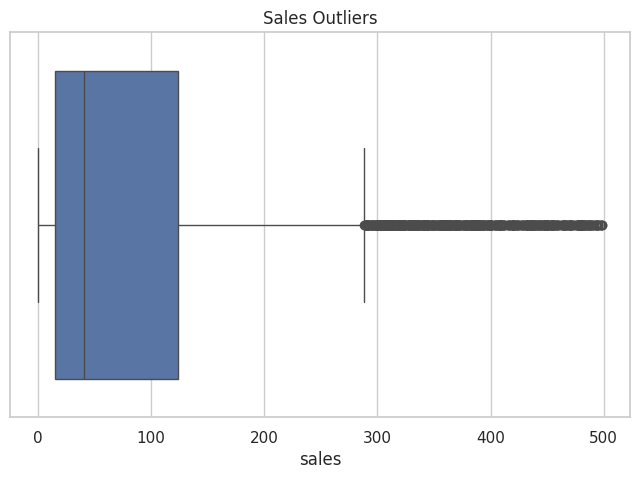

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["sales"])
plt.title("Sales Outliers")
plt.show()


## Key Insights

## Business Recommendations
- Focus marketing efforts on high-margin products.

In [19]:
plt.savefig("/kaggle/working/sales_trend.png", dpi=120)


<Figure size 640x480 with 0 Axes>